# Data Preprocessing and Exploration

### Description

The S&P 500 Index EPS, S&P 500 Index closing prices, real U.S GDP, U.S average 10-year yield(%), and average annual U.S inflation rates data for years ranging from 1979 - 2019 are imported.

All the data imported is merged into one comprehensive data frame. 

The data is then split into four decades:

Decade 1: 1979 - 1989<br>
Decade 2: 1989 - 1999<br>
Decade 3: 1999 - 2009<br>
Decade 4: 2009 - 2019<br>

The data is then exported to the project directory to be used in further analysis.

### Data manipulation and Exploration

In [1]:
# Import relevant packages
import pandas as pd
from ipynb.fs.full.Stats_Monte_Carlo_Functions import *
from ipynb.fs.full.Preprocessing_Functions import *

In [2]:
# Import American Real GDP Data
gdp_com = pd.read_csv('Data/Real_GDP.csv')
gdp_com = gdp_com.drop(['Unnamed: 0'], axis=1)

# All data is for the United States and in millions of dollars chanined to 2012
print('\n','------------ United Sates Real GDP Data ------------'.center(110),'\n')
gdp_com.info()

# Duplicates 
duplicate_rows = gdp_com[gdp_com.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen1(gdp_com['rg_gdp'], 'United Sates Real GDP')
print('\n',len(gdp_com['year'].unique()),'Unique Years:','\n', gdp_com['year'].unique(),'\n')

gdp_com.head()


                              ------------ United Sates Real GDP Data ------------                              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rg_state  41 non-null     object 
 1   rg_unit   41 non-null     object 
 2   rg_gdp    41 non-null     float64
 3   year      41 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB

duplicated rows:0


Statistics for: United Sates Real GDP
Mean:                .........12366337.94
Standard Error:      ...........600567.04
Median:              ..........12610491.0
Mode:                .........12366337.94
Std:                 ..........3845505.35
Variance:            ...14787911432210.47
Kurtosis:            ...............-1.34
Skewness:            ................0.06
Range:               .........12245833.59
Min:                 ..........6827222.41
Max:              

,rg_state,rg_unit,rg_gdp,year
0,United States,Millions of chained 2012 dollars,6.827700e+06,1979.0
1,United States,Millions of chained 2012 dollars,6.827222e+06,1980.0
2,United States,Millions of chained 2012 dollars,7.012547e+06,1981.0
3,United States,Millions of chained 2012 dollars,6.922469e+06,1982.0
4,United States,Millions of chained 2012 dollars,7.120968e+06,1983.0


Import real historical U.S GDP and explore the data.

The data is from the St.Louis Fed API https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf. 

In [3]:
# Import S&P 500 Index data
# The S&P 500 Index closing prices are the data to be analyzed
sp = pd.read_csv('Data/S&P_500_Prices.csv')
# Set column names
sp.columns = ['date', 'sp_open','sp_high', 'sp_low','sp_close','sp_adj_close','sp_volume']
# Date formating to display year as a float type
sp['year'] = sp['date'].str.replace('-', '').astype(float).divide(10000).round(0)
# Drop unneeded columns
sp = sp.drop(['date'], axis=1)

print('\n','------------------ S&P 500 Index Data ------------------'.center(110),'\n')
sp.info()

# Duplicates 
duplicate_rows = sp[sp.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen1(sp['sp_close'], 'S&P 500 Index Closing Prices')
print('\n',len(sp['year'].unique()),'Unique Years:','\n', sp['year'].unique(),'\n')

sp.head()


                            ------------------ S&P 500 Index Data ------------------                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sp_open       23052 non-null  float64
 1   sp_high       23052 non-null  float64
 2   sp_low        23052 non-null  float64
 3   sp_close      23052 non-null  float64
 4   sp_adj_close  23052 non-null  float64
 5   sp_volume     23052 non-null  int64  
 6   year          23052 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB

duplicated rows:1705


Statistics for: S&P 500 Index Closing Prices
Mean:                ..............455.82
Standard Error:      ................4.42
Median:              ...............98.66
Mode:                ................14.7
Std:                 ..............670.59
Variance:            ...........449691.01
Kurtosis:          

,sp_open,sp_high,sp_low,sp_close,sp_adj_close,sp_volume,year
0,17.660000,17.660000,17.660000,17.660000,17.660000,0,1927.0
1,17.760000,17.760000,17.760000,17.760000,17.760000,0,1928.0
2,17.719999,17.719999,17.719999,17.719999,17.719999,0,1928.0
3,17.549999,17.549999,17.549999,17.549999,17.549999,0,1928.0
4,17.660000,17.660000,17.660000,17.660000,17.660000,0,1928.0


Import S&P 500 Index historical prices and explore the data. 

There are 1,705 duplicated rows, however, based on the nature of this data there does not need to be any treatment.

The data is from yahoo finance https://ca.finance.yahoo.com/.

In [4]:
# Import S&P 500 Index earnings per share (EPS) data
sp_eps = pd.read_csv('Data/S&P_500_EPS.csv')
# Set column names
sp_eps.columns = ['date','eps']
# Reverse data
sp_eps = sp_eps.iloc[::-1]
# Date Formatting
sp_eps["date"] = pd.to_datetime(sp_eps["date"]).dt.strftime('%Y-%m-%d')
# Date formating to display year as a float type
sp_eps['year'] = sp_eps['date'].str.replace('-', '').astype(float).divide(10000).round(0)
# Drop unnneeded columns
sp_eps = sp_eps.drop(['date'], axis=1).reset_index()
sp_eps = sp_eps.drop(['index'], axis=1)

print('\n','------------ S&P 500 Index Earnings Per Share (EPS) Data ------------'.center(110),'\n')
sp_eps.info()

# Duplicates 
duplicate_rows = sp_eps[sp_eps.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen1(sp_eps['eps'], 'S&P 500 Index Earnings Per Share (EPS)')
print('\n',len(sp_eps['year'].unique()),'Unique Years:','\n', sp_eps['year'].unique(),'\n')

sp_eps.head()


                     ------------ S&P 500 Index Earnings Per Share (EPS) Data ------------                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eps     41 non-null     float64
 1   year    41 non-null     float64
dtypes: float64(2)
memory usage: 784.0 bytes

duplicated rows:0


Statistics for: S&P 500 Index Earnings Per Share (EPS)
Mean:                ...............66.28
Standard Error:      ................4.91
Median:              ...............59.39
Mode:                ...............66.28
Std:                 ...............31.43
Variance:            ..............988.04
Kurtosis:            ...............-0.61
Skewness:            ................0.64
Range:               ..............121.82
Min:                 ...............18.27
Max:                 ..............140.09
Sum:                 .............2717.43
Count:    

,eps,year
0,50.01,1979.0
1,44.33,1980.0
2,42.18,1981.0
3,33.43,1982.0
4,35.75,1983.0


Import the S&P 500 Index historical EPS and explore the data.

The data is from yahoo finance https://ca.finance.yahoo.com/.

In [5]:
# Import ten year United States Treasury Rates Data
ten_year = pd.read_csv('Data/10y_US_Rates.csv')
#Set column names
ten_year.columns = ['year', 'average_10y_yield_%','year_open','year_high','year_low','year_close',
                    'annual_%_change']

print('\n','------------ Ten Year United States Treasury Rates Data ------------'.center(110),'\n')
ten_year.info()

# Duplicates 
duplicate_rows = ten_year[ten_year.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen1(ten_year['average_10y_yield_%'].str.replace('%','').astype(float), 
                  'Average Ten Year United States Treasury Rates')
print('\n',len(ten_year['year'].unique()),'Unique Years:','\n',ten_year['year'].unique(),'\n')

ten_year.head()


                      ------------ Ten Year United States Treasury Rates Data ------------                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 58 non-null     int64 
 1   average_10y_yield_%  58 non-null     object
 2   year_open            58 non-null     object
 3   year_high            58 non-null     object
 4   year_low             58 non-null     object
 5   year_close           58 non-null     object
 6   annual_%_change      58 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.3+ KB

duplicated rows:0


Statistics for: Average Ten Year United States Treasury Rates
Mean:                ................6.07
Standard Error:      ................0.39
Median:              ................5.95
Mode:                ................2.14
Std:                 ................2.95

,year,average_10y_yield_%,year_open,year_high,year_low,year_close,annual_%_change
0,2020,1.13%,1.88%,1.88%,0.54%,0.64%,-66.67%
1,2019,2.14%,2.66%,2.79%,1.47%,1.92%,-28.62%
2,2018,2.91%,2.46%,3.24%,2.44%,2.69%,11.83%
3,2017,2.33%,2.44%,2.63%,2.04%,2.41%,-1.59%
4,2016,1.84%,2.24%,2.60%,1.37%,2.44%,7.68%


Import historical ten year U.S treasury rates and explore the data.

The data is from the U.S department of the treasury https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield.

In [6]:
# Import United Sates Inflation Data
inflation = pd.read_csv('Data/historical_U.S_Inflation.csv')
# Drop NA values
inflation = inflation.dropna()

print('\n','------------------ United Sates Inflation Rates Data ------------------'.center(110),'\n')
inflation.info()

# Duplicates 
duplicate_rows = inflation[inflation.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen1(inflation['average'],'Average United States Inflation Rates')
print('\n',len(inflation['year'].unique()),'Unique Years:','\n',inflation['year'].unique(),'\n')

inflation.head()


                    ------------------ United Sates Inflation Rates Data ------------------                     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     106 non-null    float64
 1   average  106 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB

duplicated rows:0


Statistics for: Average United States Inflation Rates
Mean:                ................3.22
Standard Error:      ................0.46
Median:              ................2.65
Mode:                .................1.6
Std:                 ................4.75
Variance:            ...............22.53
Kurtosis:            ................2.27
Skewness:            ................0.49
Range:               ................28.5
Min:                 ...............-10.5
Max:                 ................18.0
Sum:                 ...............341.4
Count:    

,year,average
0,1914.0,1.0
1,1915.0,1.0
2,1916.0,7.9
3,1917.0,17.4
4,1918.0,18.0


Import historical U.S inflation rates and explore the data.

The data is from U.S inflation calculator https://www.usinflationcalculator.com/inflation/historical-inflation-rates/.


               ------------ Clean Comprehensive Dataframe of All Imported Dataframes ------------               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10283 entries, 0 to 10282
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      10283 non-null  float64
 1   s&p_eps                   10283 non-null  float64
 2   s&p_closing_prices        10283 non-null  float64
 3   real_gdp                  10283 non-null  float64
 4   average_10y_yield_%       10283 non-null  float64
 5   average_annual_inflation  10283 non-null  float64
dtypes: float64(6)
memory usage: 562.4 KB

duplicated rows:211


s&p_eps  stats                          s&p_closing_prices  stats            real_gdp
Mean:                ..........65.82    Mean:             .........965.35    Mean:               ......12320591.12
Standard Error:      ............0.3    Standard Error:   ...........7.

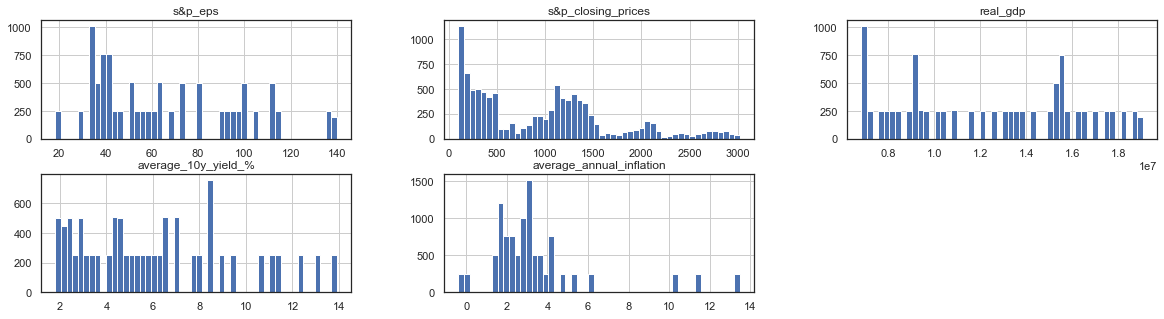


X continuous descriptive stats:
            s&p_eps  s&p_closing_prices      real_gdp  average_10y_yield_%  \
count  10283.000000        10283.000000  1.028300e+04         10283.000000   
mean      65.816323          965.351609  1.232059e+07             6.142071   
std       30.628051          733.399419  3.776304e+06             3.266327   
min       18.270000           96.129997  6.827222e+06             1.800000   
25%       39.370000          308.509994  9.095858e+06             3.260000   
50%       59.390000          943.000000  1.261049e+07             5.650000   
75%       91.590000         1353.535034  1.560469e+07             8.390000   
max      140.090000         3025.860107  1.907306e+07            13.920000   

       average_annual_inflation  
count              10283.000000  
mean                   3.431975  
std                    2.668032  
min                   -0.400000  
25%                    2.100000  
50%                    2.800000  
75%                    3.6

,year,s&p_eps,s&p_closing_prices,real_gdp,average_10y_yield_%,average_annual_inflation
0,1979.0,50.01,96.730003,6.827700e+06,9.43,11.3
1,1979.0,50.01,97.800003,6.827700e+06,9.43,11.3
2,1979.0,50.01,98.580002,6.827700e+06,9.43,11.3
3,1979.0,50.01,99.129997,6.827700e+06,9.43,11.3
4,1979.0,50.01,98.800003,6.827700e+06,9.43,11.3


In [163]:
# Merge all imported dataframes with relevant features
# Merge data frames
com = pd.merge(sp, gdp_com, on='year')
# Drop unnneeded columns
com = com.drop(['sp_open', 'sp_high', 'sp_low', 'sp_adj_close', 'sp_volume','rg_unit','rg_state'],axis=1)
# Merge data frames
com = pd.merge(com, sp_eps, on='year', how='left')
# Reorder coulumn placement
com = com[['year','eps','sp_close','rg_gdp']]
# Set column names
com.columns = ['year','s&p_eps','s&p_closing_prices','real_gdp']
# Merge data frames
com = pd.merge(com, ten_year, on='year', how='left')
# Drop unnneeded columns
com = com.drop(['year_open','year_high','year_low','year_close','annual_%_change'], axis=1)
# Merge data frames
com = pd.merge(com, inflation, on='year', how='left')
# Set column names
com.columns = ['year','s&p_eps','s&p_closing_prices','real_gdp',
               'average_10y_yield_%','average_annual_inflation']

# Drop missing values created due to the differences in dataframes
clean_com = com.dropna()

print('\n','------------ Clean Comprehensive Dataframe of All Imported Dataframes ------------'.center(110),'\n')

# Format average_10y_yield_% into workable data
# Date formating to display year as a float type
clean_com['average_10y_yield_%'] = clean_com['average_10y_yield_%'].str.replace('%','')
clean_com['average_10y_yield_%'] = clean_com['average_10y_yield_%'].astype(float)
clean_com['year'] = clean_com['year'].astype(float)

clean_com.info()

# Duplicates 
duplicate_rows = clean_com[clean_com.duplicated()]
duplicate_rows.shape[0]
print('\n' + 'duplicated rows:' + str(duplicate_rows.shape[0]))

# Descriptive stats are shown for features to be used in the analysis
series_stats_gen3(clean_com['s&p_eps'],clean_com['s&p_closing_prices'],clean_com['real_gdp'], 
                  clean_com['average_10y_yield_%'],clean_com['average_annual_inflation'])

print('\n',len(clean_com['year'].unique()),'Unique Years:','\n',clean_com['year'].unique(),'\n')

dummy = clean_com.copy()
dummy['dummy_col'] = 0
dummy = dummy.drop(['year'], axis = 1)
num_univariate_histogram(df = dummy, length = 5, width = 20, rows = 2, col = 3, font = 1)

clean_com.head()

All the imported data is merged into one comprehensive data frame.


In [8]:
# Convert & export final data frame as csv
clean_com.to_csv('Data/Comprehensive_Data.csv', sep = ',', encoding = 'utf-8')

The data frame is exported for further analysis. <br>



                                ------------ Decade 1: 1979 - 1989 ------------                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     2529 non-null   int64  
 1   year                      2529 non-null   float64
 2   s&p_eps                   2529 non-null   float64
 3   s&p_closing_prices        2529 non-null   float64
 4   real_gdp                  2529 non-null   float64
 5   average_10y_yield_%       2529 non-null   float64
 6   average_annual_inflation  2529 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 138.4 KB


s&p_eps  stats                          s&p_closing_prices  stats            real_gdp
Mean:                ..........40.48    Mean:             .........176.64    Mean:               .......7572617.54
Standard Error:      .......

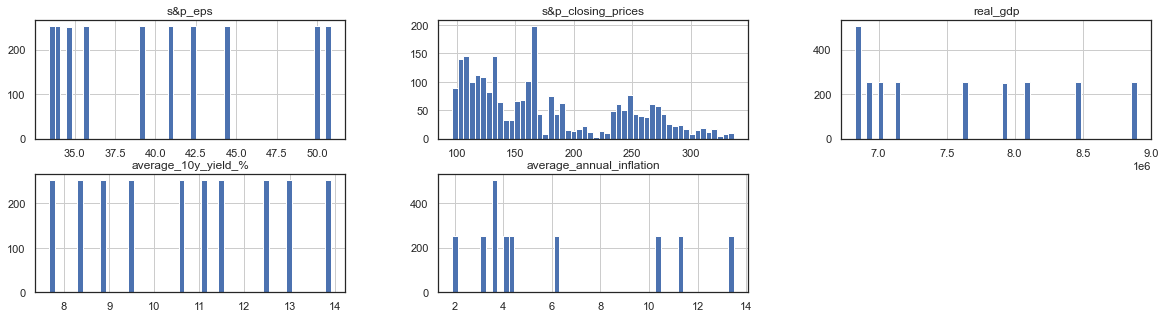


X continuous descriptive stats:
           s&p_eps  s&p_closing_prices      real_gdp  average_10y_yield_%  \
count  2529.000000         2529.000000  2.529000e+03          2529.000000   
mean     40.484365          176.644606  7.572618e+06            10.688027   
std       6.088679           63.467354  7.072410e+05             1.976948   
min      33.430000           96.129997  6.827222e+06             7.670000   
25%      34.500000          122.300003  6.922469e+06             8.850000   
50%      40.790000          162.740005  7.120968e+06            11.100000   
75%      44.330000          236.589996  8.103923e+06            12.460000   
max      50.870000          336.769989  8.899168e+06            13.920000   

       average_annual_inflation  
count               2529.000000  
mean                   6.201028  
std                    3.810880  
min                    1.900000  
25%                    3.600000  
50%                    4.300000  
75%                   10.300000  
m

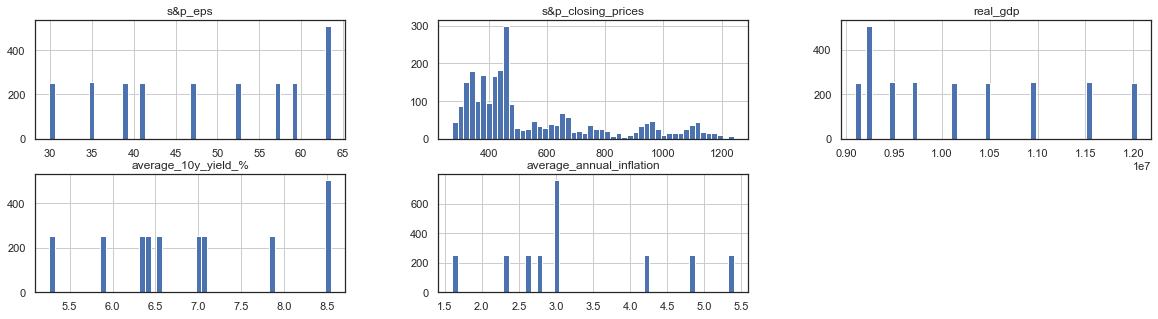


X continuous descriptive stats:
           s&p_eps  s&p_closing_prices      real_gdp  average_10y_yield_%  \
count  2528.000000         2528.000000  2.528000e+03          2528.000000   
mean     48.709743          553.193121  1.018602e+07             6.948975   
std      11.568840          241.728113  9.818465e+05             1.027723   
min      29.890000          275.309998  9.095858e+06             5.260000   
25%      38.750000          380.067505  9.232383e+06             6.350000   
50%      46.810000          456.384994  9.690657e+06             6.790000   
75%      59.390000          662.305023  1.094794e+07             7.860000   
max      63.560000         1241.810059  1.203828e+07             8.550000   

       average_annual_inflation  
count               2528.000000  
mean                   3.270293  
std                    1.111454  
min                    1.600000  
25%                    2.600000  
50%                    3.000000  
75%                    4.200000  
m

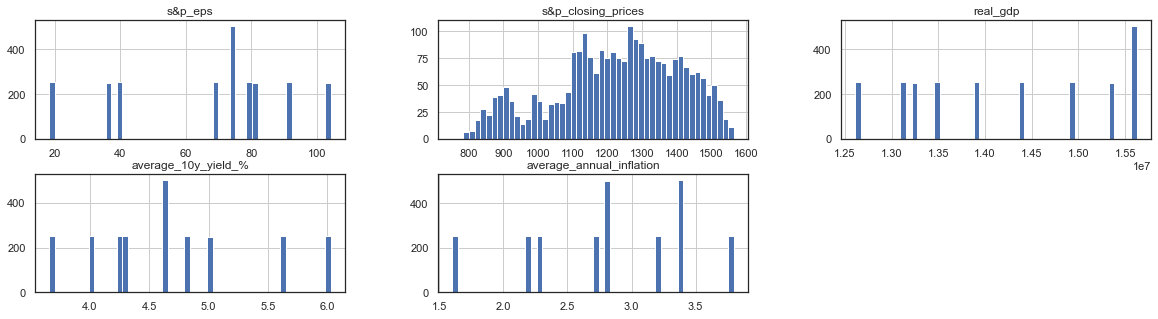


X continuous descriptive stats:
           s&p_eps  s&p_closing_prices      real_gdp  average_10y_yield_%  \
count  2515.000000         2515.000000  2.515000e+03          2515.000000   
mean     66.669630         1225.259333  1.422744e+07             4.696060   
std      25.592533          181.608744  1.048984e+06             0.687109   
min      18.270000          752.440002  1.261049e+07             3.660000   
25%      39.370000         1113.599976  1.326208e+07             4.270000   
50%      74.170000         1241.869995  1.440638e+07             4.610000   
75%      81.330000         1365.710022  1.533826e+07             5.020000   
max     104.260000         1565.150024  1.562603e+07             6.030000   

       average_annual_inflation  
count               2515.000000  
mean                   2.820278  
std                    0.628381  
min                    1.600000  
25%                    2.300000  
50%                    2.800000  
75%                    3.400000  
m

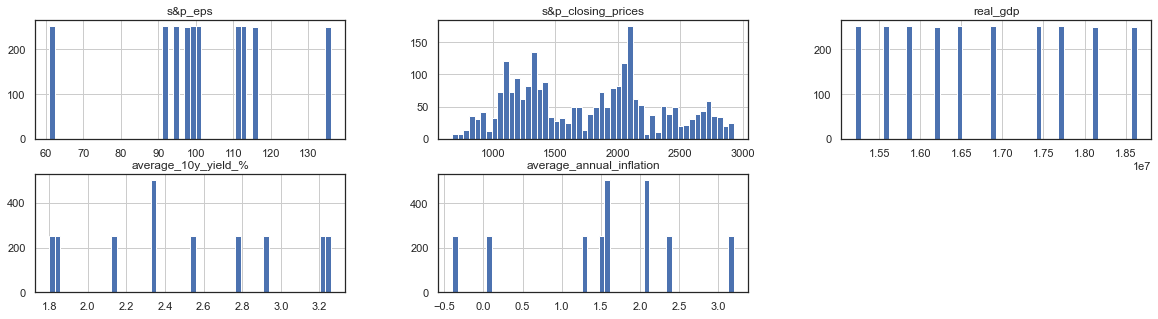


X continuous descriptive stats:
           s&p_eps  s&p_closing_prices      real_gdp  average_10y_yield_%  \
count  2516.000000         2516.000000  2.516000e+03          2516.000000   
mean    101.857866         1765.765405  1.680841e+07             2.517488   
std      18.473353          565.408212  1.077404e+06             0.494756   
min      60.920000          676.530029  1.520883e+07             1.800000   
25%      94.430000         1278.315002  1.584066e+07             2.140000   
50%     100.265000         1805.450012  1.670370e+07             2.540000   
75%     112.460000         2124.222473  1.768889e+07             2.910000   
max     136.020000         2930.750000  1.863816e+07             3.260000   

       average_annual_inflation  
count               2516.000000  
mean                   1.549006  
std                    1.001920  
min                   -0.400000  
25%                    1.300000  
50%                    1.600000  
75%                    2.100000  
m

In [160]:
# Decade 1: 1979 - 1989 for clean_com data
da_1 = clean_com.iloc[((clean_com['year'] >= 1979) & (clean_com['year'] < 1989)).values, [0, 1, 2, 3, 4, 5]]
da_1 = da_1.reset_index()
print('\n\n','------------ Decade 1: 1979 - 1989 ------------'.center(110),'\n')
da_1.info()
series_stats_gen3(da_1['s&p_eps'],da_1['s&p_closing_prices'],da_1['real_gdp'], 
                  da_1['average_10y_yield_%'],da_1['average_annual_inflation'])

dummy_1 = da_1.copy()
dummy_1['dummy_col'] = 0
dummy_1 = dummy_1.drop(['year','index'], axis = 1)
num_univariate_histogram(df = dummy_1, length = 5, width = 20, rows = 2, col = 3, font = 1)

# Decade 2: 1989 - 1999 for clean_com data
da_2 = clean_com.iloc[((clean_com['year'] >= 1989) & (clean_com['year'] < 1999)).values, [0, 1, 2, 3, 4, 5]]
da_2 = da_2.reset_index()
print('\n\n','------------ Decade 2: 1989 - 1999 ------------'.center(110),'\n')
da_2.info()
series_stats_gen3(da_2['s&p_eps'],da_2['s&p_closing_prices'],da_2['real_gdp'], 
                  da_2['average_10y_yield_%'],da_2['average_annual_inflation'])

dummy_2 = da_2.copy()
dummy_2['dummy_col'] = 0
dummy_2 = dummy_2.drop(['year','index'], axis = 1)
num_univariate_histogram(df = dummy_2, length = 5, width = 20, rows = 2, col = 3, font = 1)

# Decade 3: 1999 - 2009 for clean_com data
da_3 = clean_com.iloc[((clean_com['year'] >= 1999) & (clean_com['year'] < 2009)).values, [0, 1, 2, 3, 4, 5]]
da_3 = da_3.reset_index()
print('\n\n','------------ Decade 3: 1999 - 2009 ------------'.center(110),'\n')
da_3.info()
series_stats_gen3(da_3['s&p_eps'],da_3['s&p_closing_prices'],da_3['real_gdp'], 
                  da_3['average_10y_yield_%'],da_3['average_annual_inflation'])

dummy_3 = da_3.copy()
dummy_3['dummy_col'] = 0
dummy_3 = dummy_3.drop(['year','index'], axis = 1)
num_univariate_histogram(df = dummy_3, length = 5, width = 20, rows = 2, col = 3, font = 1)

# Decade 4: 2009 - 2019 for clean_com data
da_4 = clean_com.iloc[((clean_com['year'] >= 2009) & (clean_com['year'] < 2019)).values, [0, 1, 2, 3, 4, 5]]
da_4 = da_4.reset_index()
print('\n\n','------------ Decade 4: 2009 - 2019 ------------'.center(110),'\n')
da_4.info()
series_stats_gen3(da_4['s&p_eps'],da_4['s&p_closing_prices'],da_4['real_gdp'], 
                  da_4['average_10y_yield_%'],da_4['average_annual_inflation'])

dummy_4 = da_4.copy()
dummy_4['dummy_col'] = 0
dummy_4 = dummy_4.drop(['year','index'], axis = 1)
num_univariate_histogram(df = dummy_4, length = 5, width = 20, rows = 2, col = 3, font = 1)

As noted in the description the comprehensive data frame is separated into four decades: 

Decade 1: 1979 - 1989<br>
Decade 2: 1989 - 1999<br>
Decade 3: 1999 - 2009<br>
Decade 4: 2009 - 2019<br>

The data within the individual decades are explored.

In [10]:
# Convert & export final data frame as csv
da_1.to_csv('Data/Decade1.csv', sep = ',', encoding = 'utf-8')
da_2.to_csv('Data/Decade2.csv', sep = ',', encoding = 'utf-8')
da_3.to_csv('Data/Decade3.csv', sep = ',', encoding = 'utf-8')
da_4.to_csv('Data/Decade4.csv', sep = ',', encoding = 'utf-8')

Exported all data frames of each individual decade into the project directory for further analysis. <br>